<a href="https://colab.research.google.com/github/TsuTsu03/Calculator/blob/main/Handwritten_Image_Predictor_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Importing necessary libraries for building the model**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


### **1.1 Loading the Data set**

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **2. Data Visualization**

Plotting/Displaying first 9 images

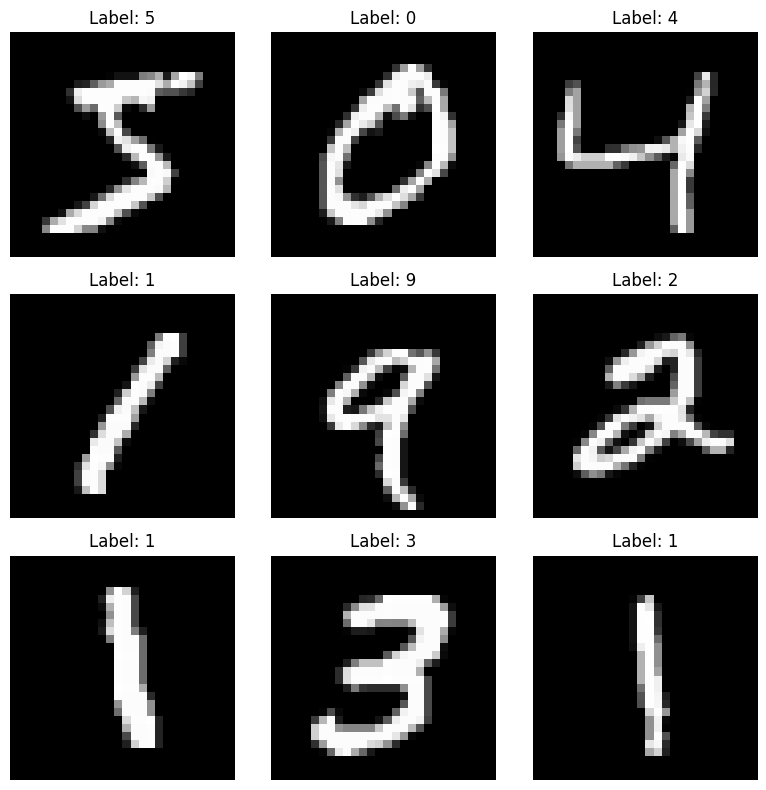

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()

## **2.2 Normalizing Pixels of the images**

In [26]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## **2.3 Reshaping the input data**

In [27]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

### **3. Building the CNN Model**

 **3.1 Defining the Model Architecture**

In [28]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

**3.2 Compiling the model**

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**3.3 Training the model**

In [30]:
trained_model = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1464 - accuracy: 0.9559 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0394 - val_accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0287 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0276 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0336 - val_accuracy: 0.9894


**3.4 Summary of training based on the val_loss, loss and accuracy**

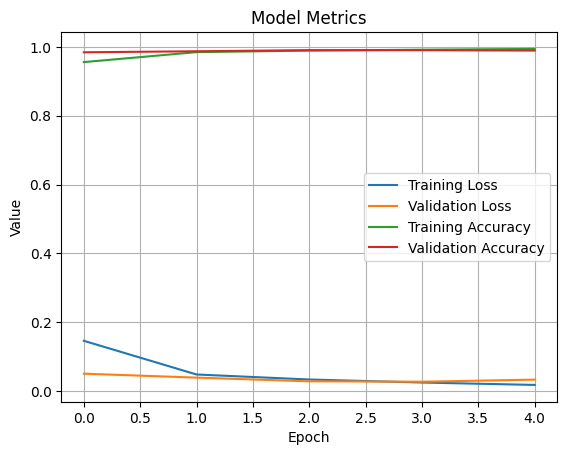

In [33]:
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**3.5 Evaluation of the Model**

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.0336 - accuracy: 0.9894
Test Loss: 0.03358253091573715
Test Accuracy: 0.9894000291824341


**3.6 Saving the Model**

In [35]:
model.save("flores_cnn_model.h5")

**3.7 Loading the Model**

In [36]:
from tensorflow.keras.models import load_model
new_model = load_model('flores_cnn_model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

### **4. Final Output - Testing the Model**

1/1 [==============================] - 0s 24ms/step
Predicted Number: 5


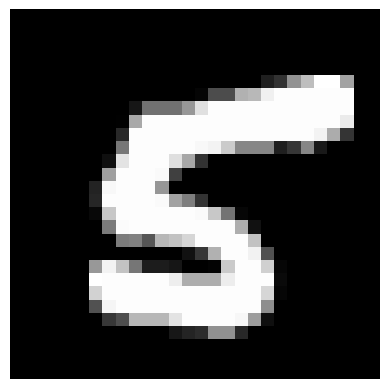

In [39]:
from tensorflow.keras.utils import save_img, load_img, img_to_array

index = np.random.randint(0, len(x_test))
save_img("saved_image.png", x_test[index])
loaded_image = load_img("saved_image.png", color_mode='grayscale')
image_array = img_to_array(loaded_image)
reshaped_image = image_array.reshape((1, 28, 28, 1))

predictions = model.predict(reshaped_image)
predicted_number = np.argmax(predictions)

print("Predicted Number:", predicted_number)

plt.imshow(loaded_image, cmap='gray')
plt.axis('off')
plt.show()